Regression: cnt (the number of bikes rented that day).

Classification: Convert cnt into categories, e.g.

Low demand (bottom 33%)

Medium demand (middle 33%)

High demand (top 33%)


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
url = "https://raw.githubusercontent.com/tramplingh/Machine-Learning-Projects/refs/heads/main/bikeSharing/bikeSharing.csv"
df = pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Summary Statistics and Data Preprocessing

In [40]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [42]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


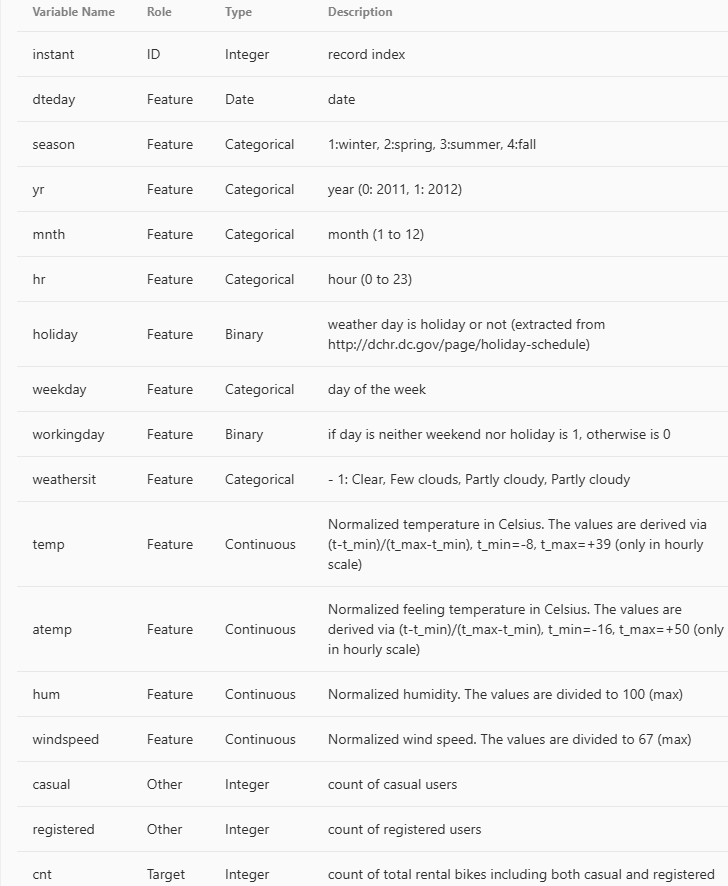

In [43]:
cat_cols = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']

cat_df = df[cat_cols]
cat_df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,1,0,1,0,0,6,0,1
1,1,0,1,1,0,6,0,1
2,1,0,1,2,0,6,0,1
3,1,0,1,3,0,6,0,1
4,1,0,1,4,0,6,0,1


In [44]:
num_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']
num_df = df[num_cols]
num_df.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.24,0.2879,0.81,0.0,3,13,16
1,0.22,0.2727,0.80,0.0,8,32,40
2,0.22,0.2727,0.80,0.0,5,27,32
3,0.24,0.2879,0.75,0.0,3,10,13
4,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis

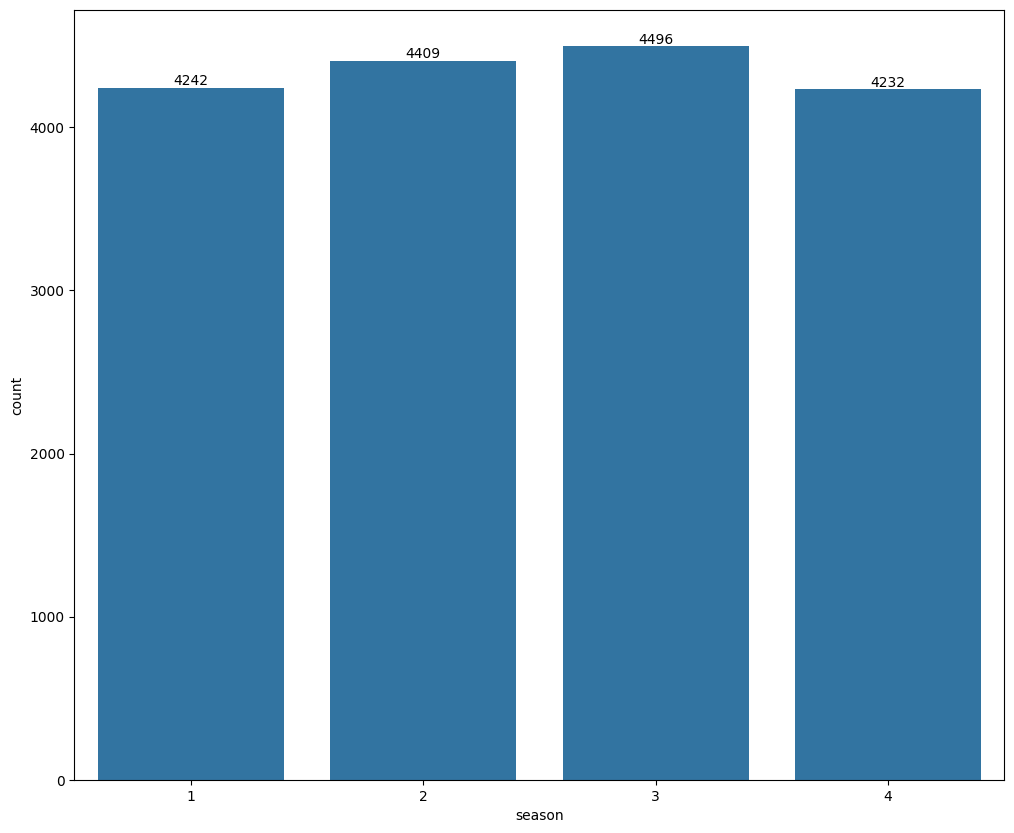

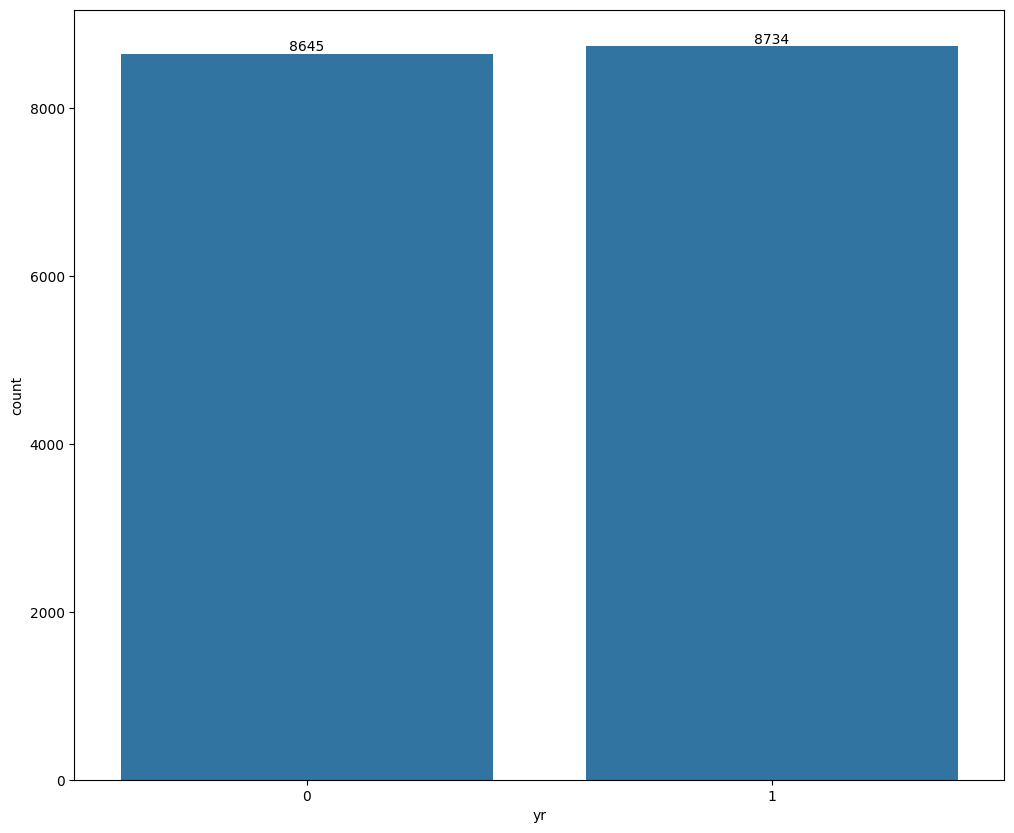

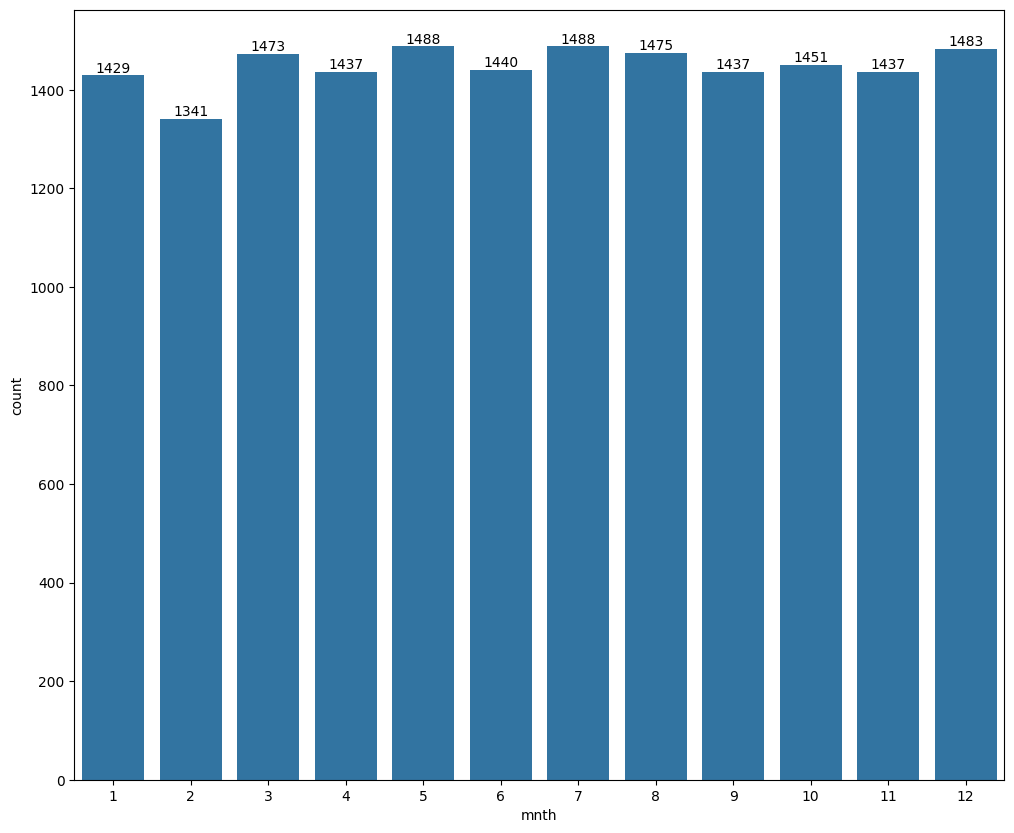

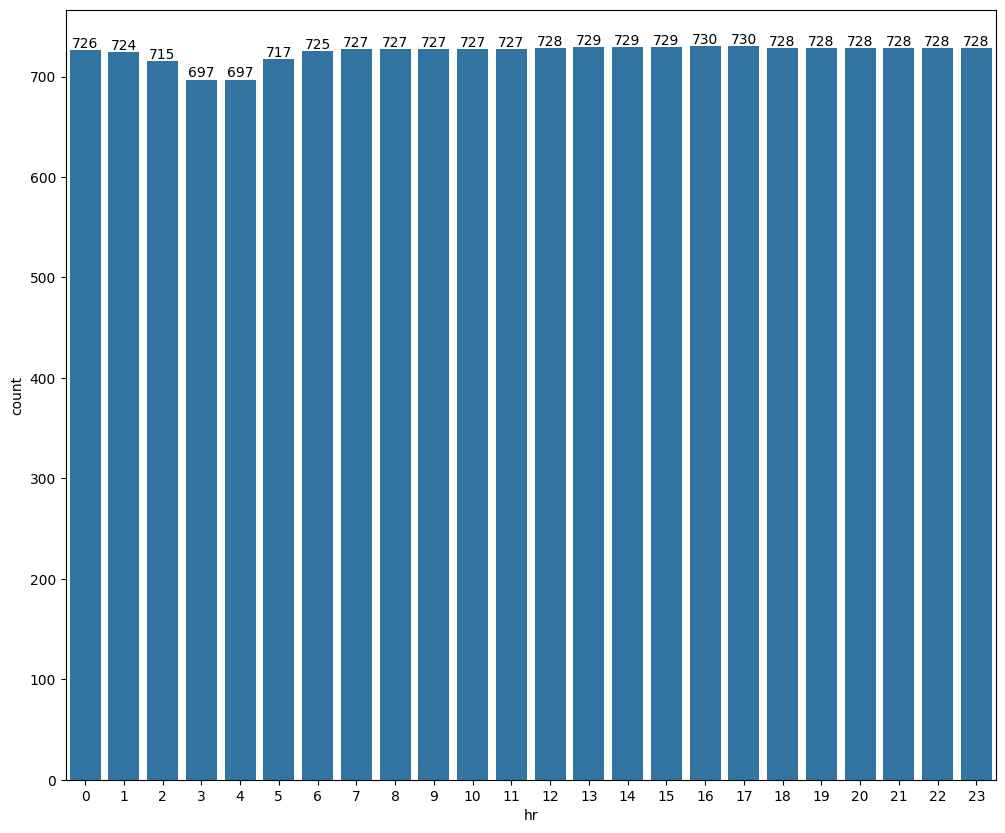

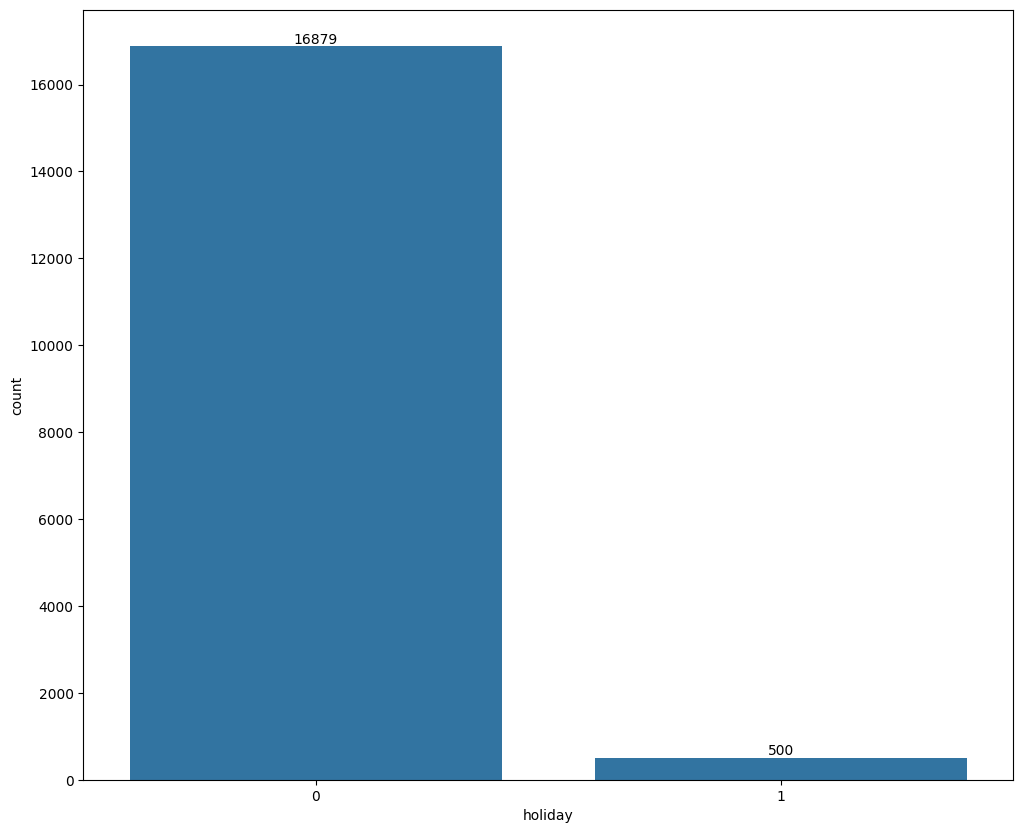

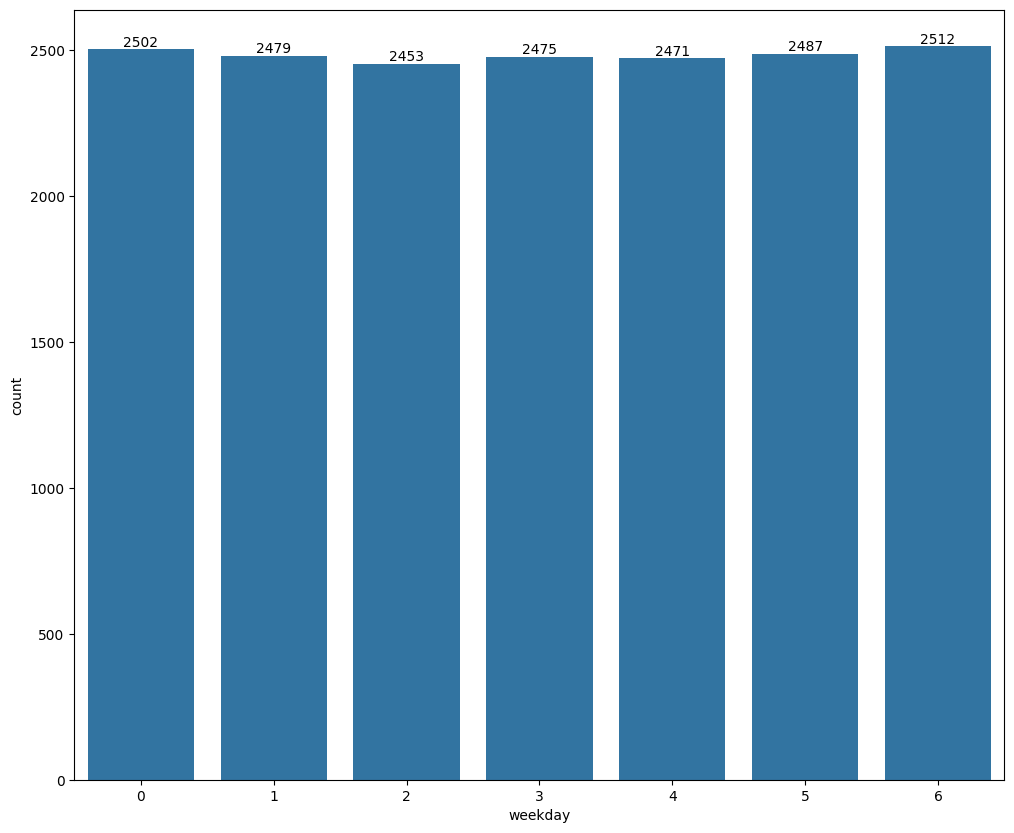

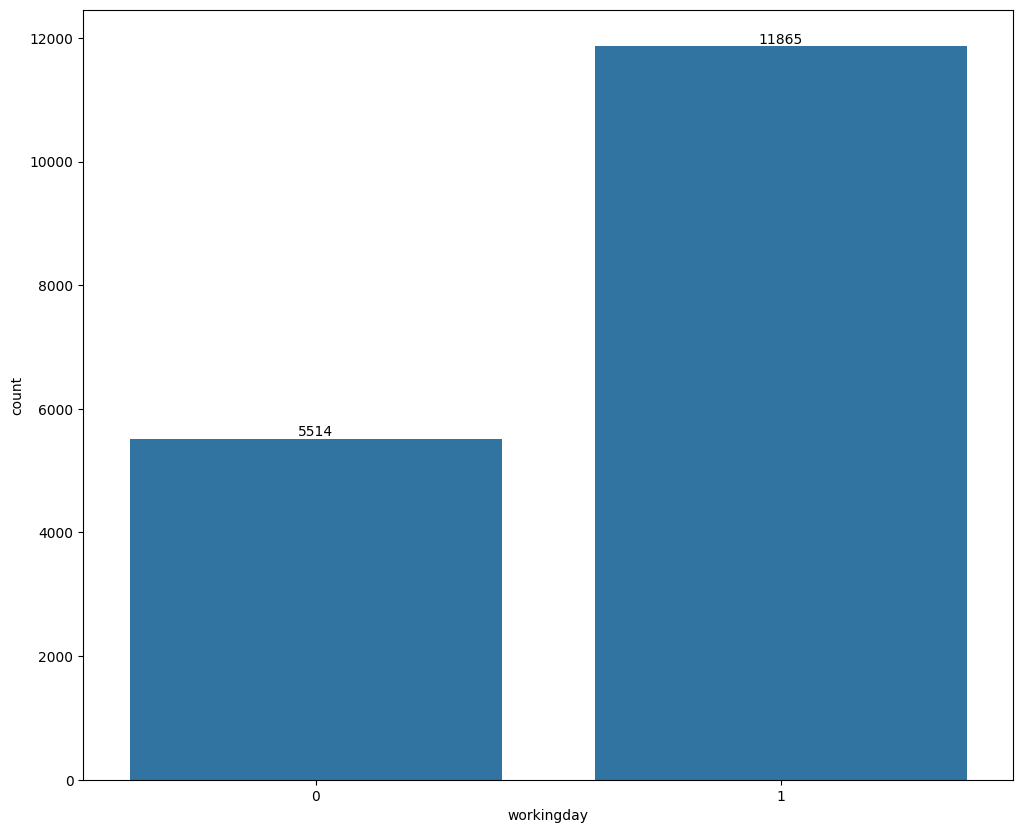

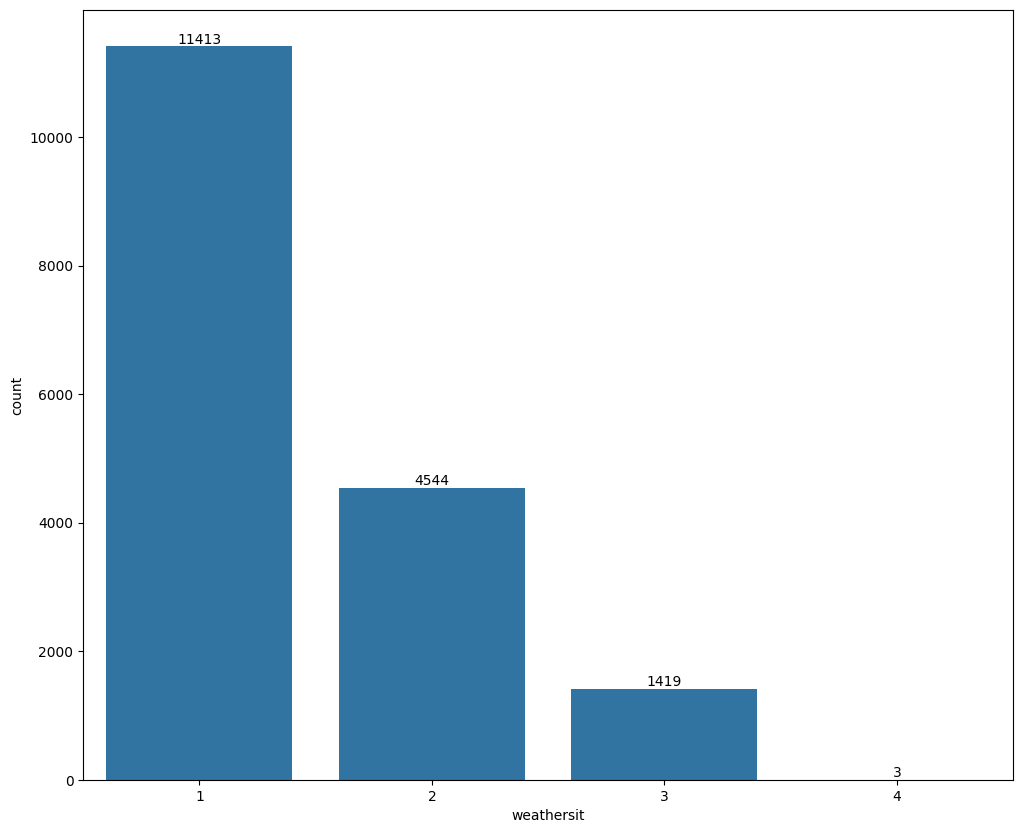

In [45]:
for column in cat_df.columns:
  plt.figure(figsize=(12,10))
  ax = sns.countplot(x=column, data=cat_df)
  ax.bar_label(ax.containers[0])
  plt.show()


####season: More in spring and summer.
####year: Fairly same number of riders.
####month: Variation of demand in different months. Less riders in Feb.
####hour: Less riders at 3 and 4 am.
####holiday: Almost all are not holidays.
####weekday: Similar number of riders on all days.
####workingday: Two-thirds riders on workingdays.
####weathersit: More riders on a clear day.

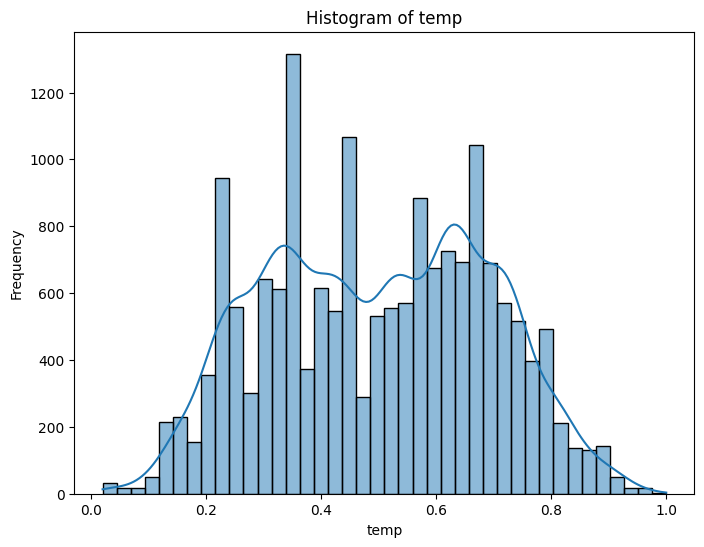

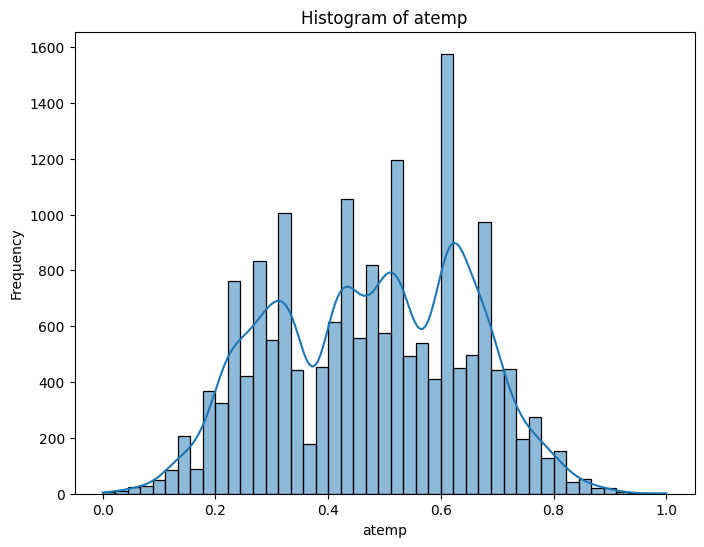

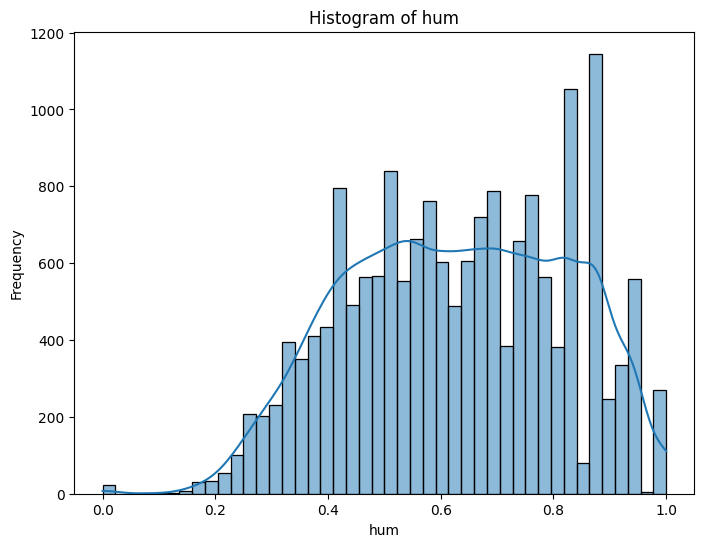

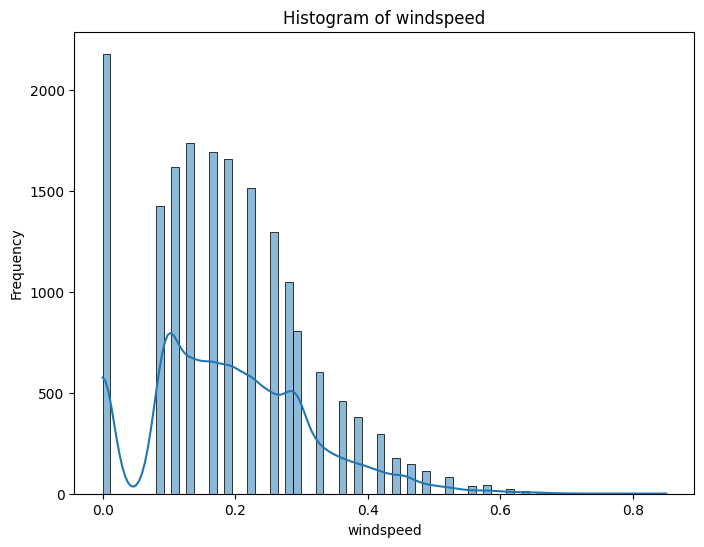

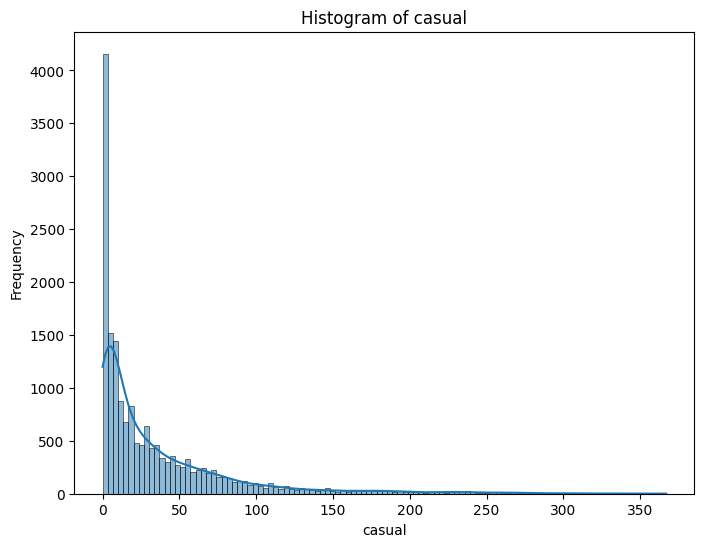

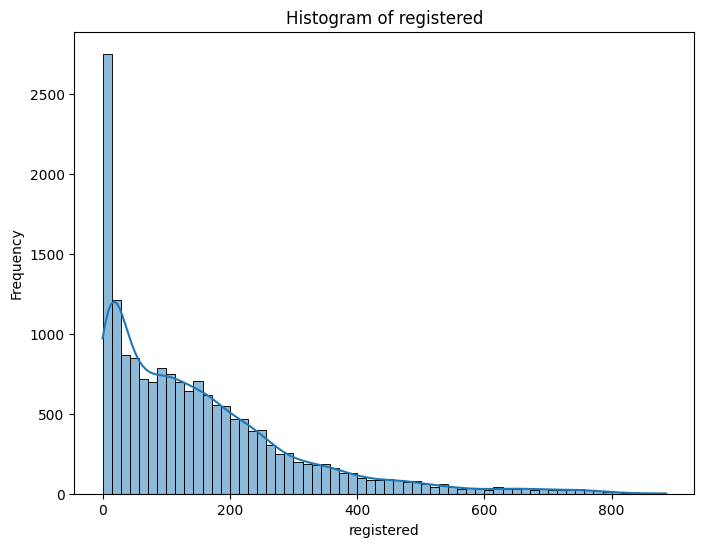

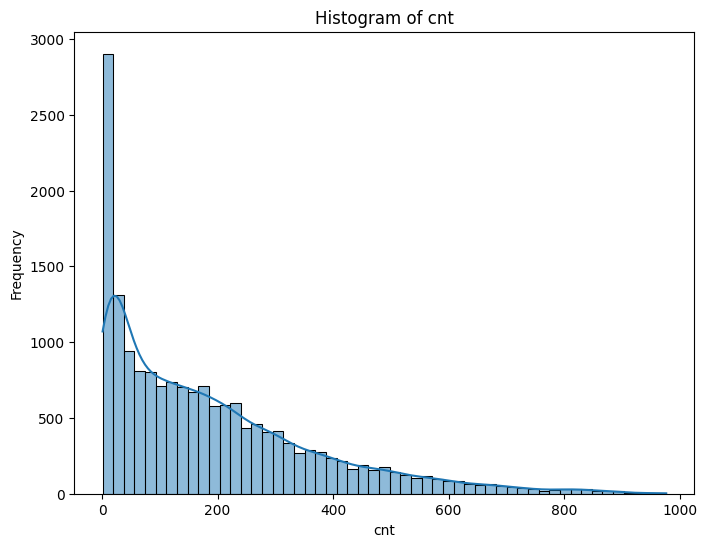

In [46]:
for column in num_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(num_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

####temp and atemp: peaks around the middle
####hum: skewed towards the right
####windspeed: large number of zero or low values, and frequency of riders decreases with increase of riders
####casual, registered, cnt: heavily skewed to the right.

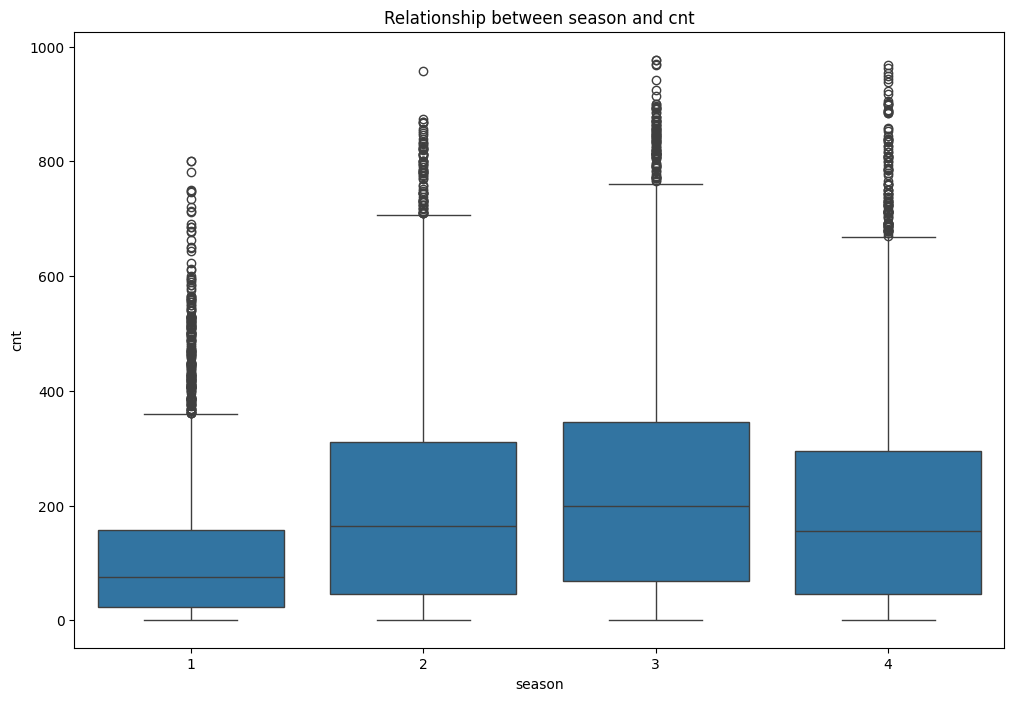

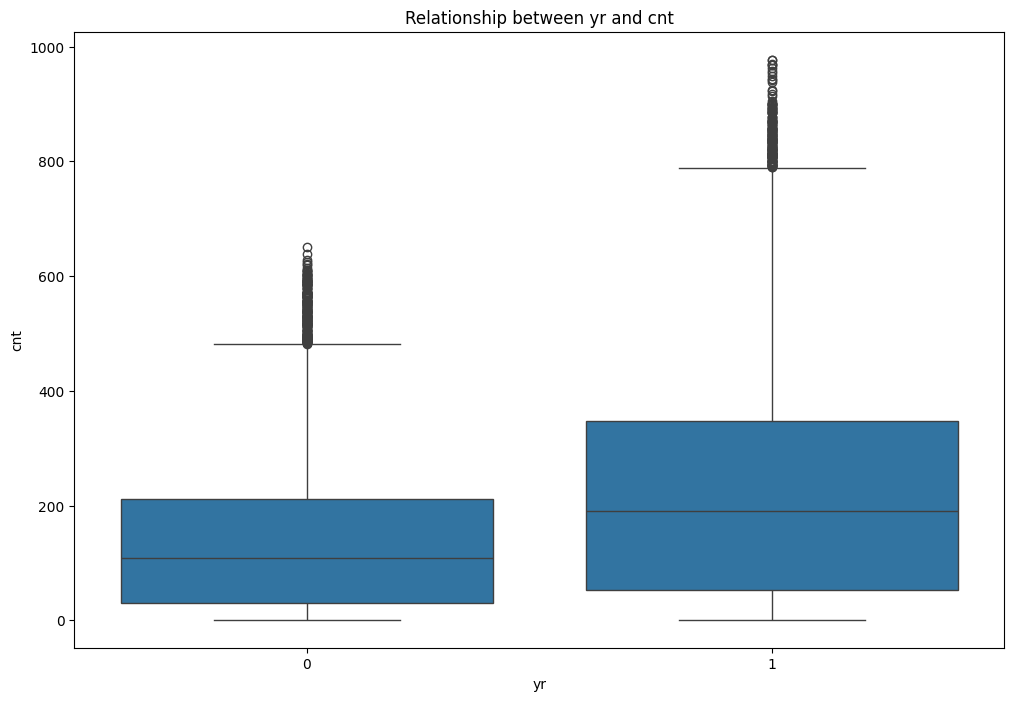

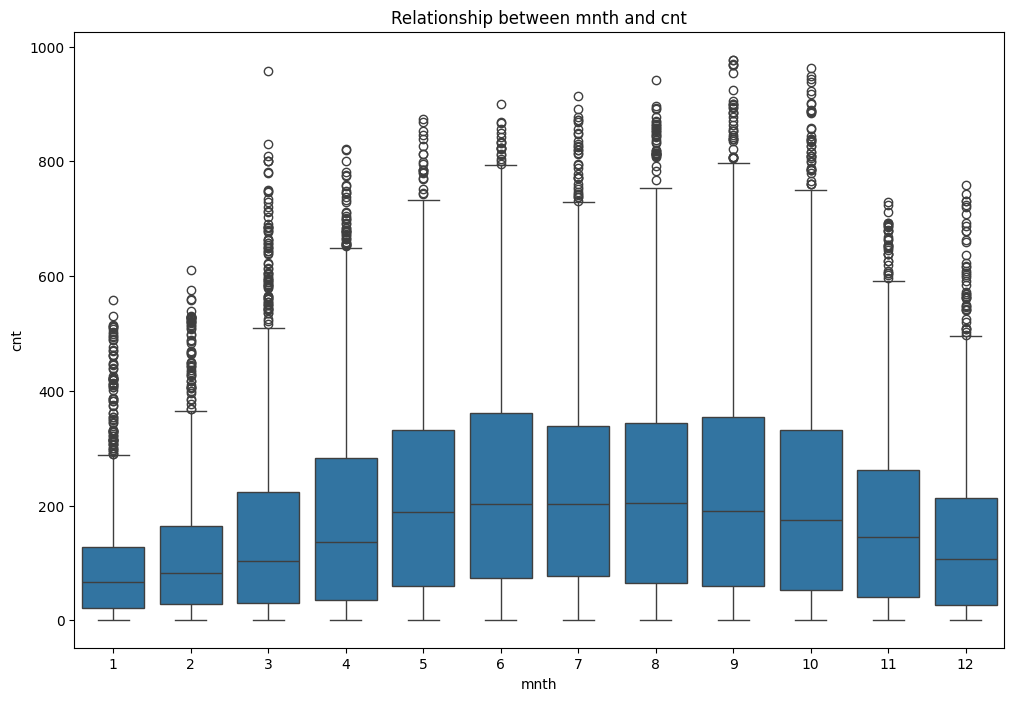

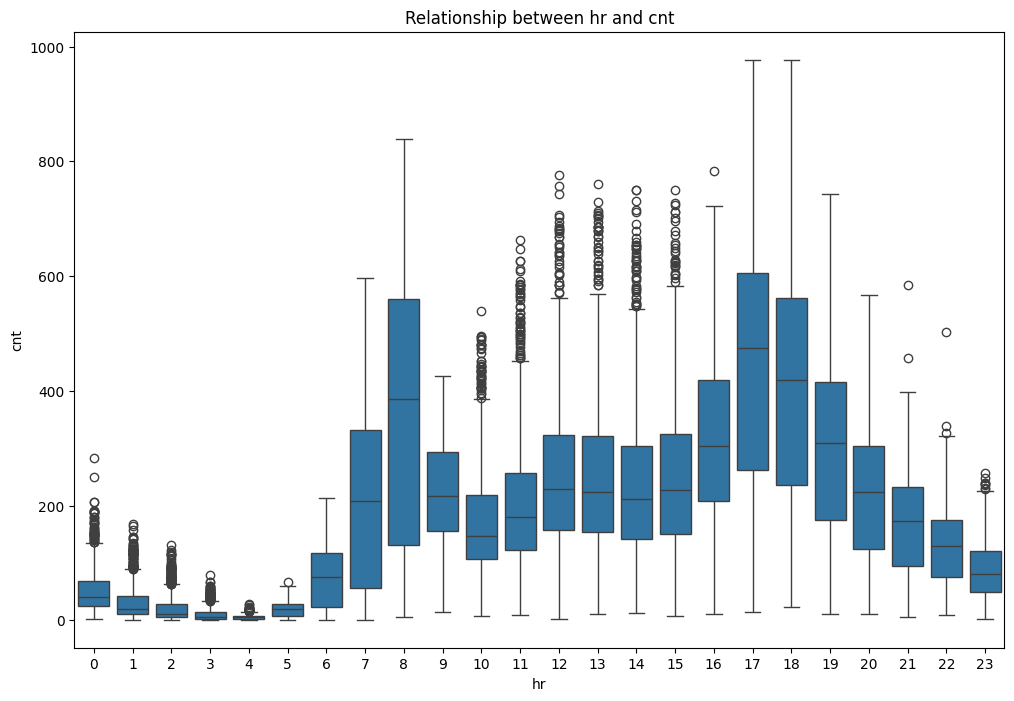

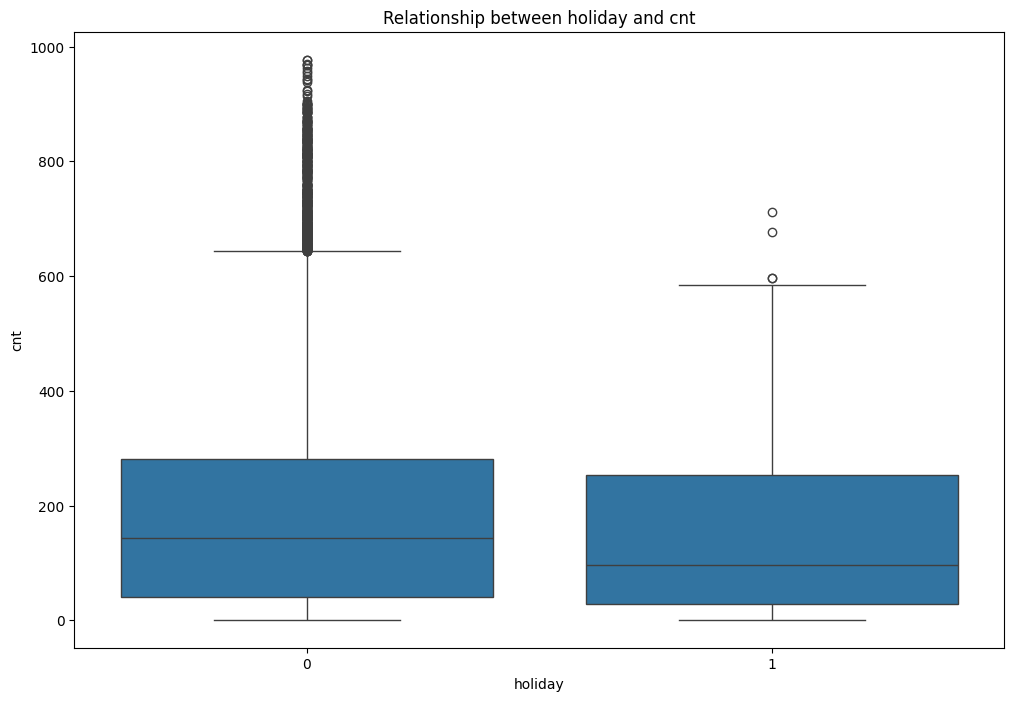

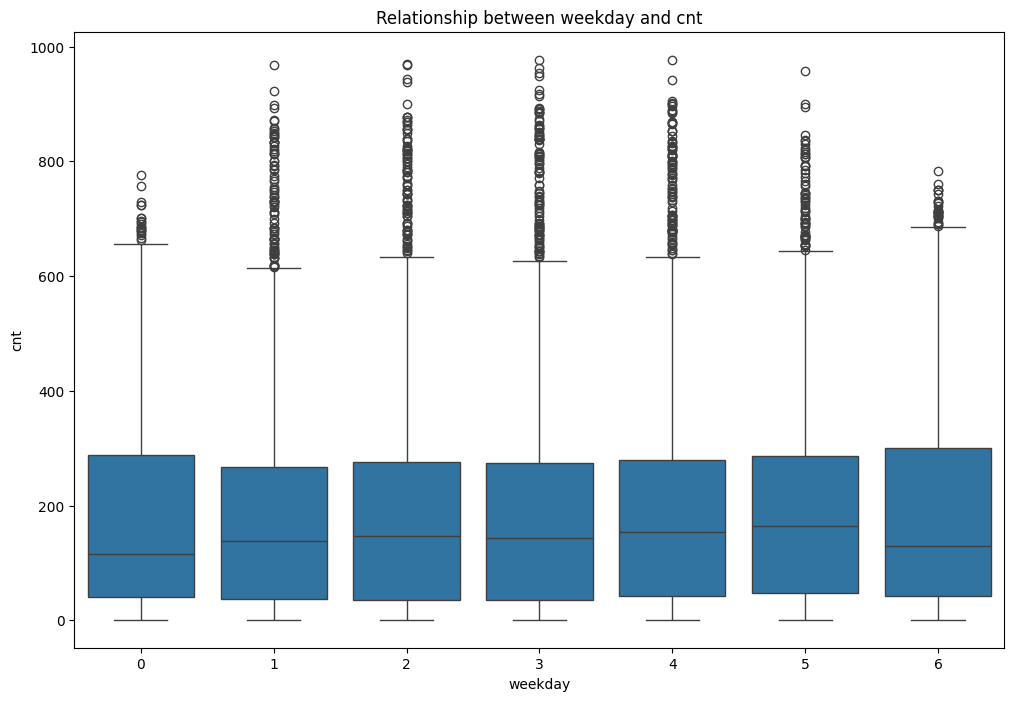

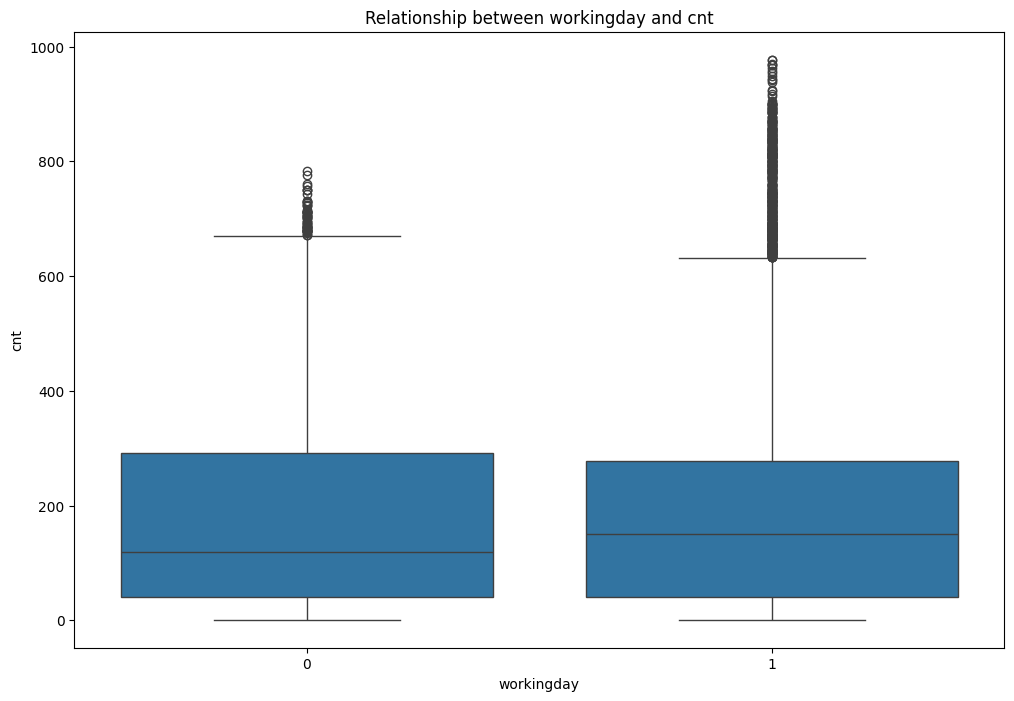

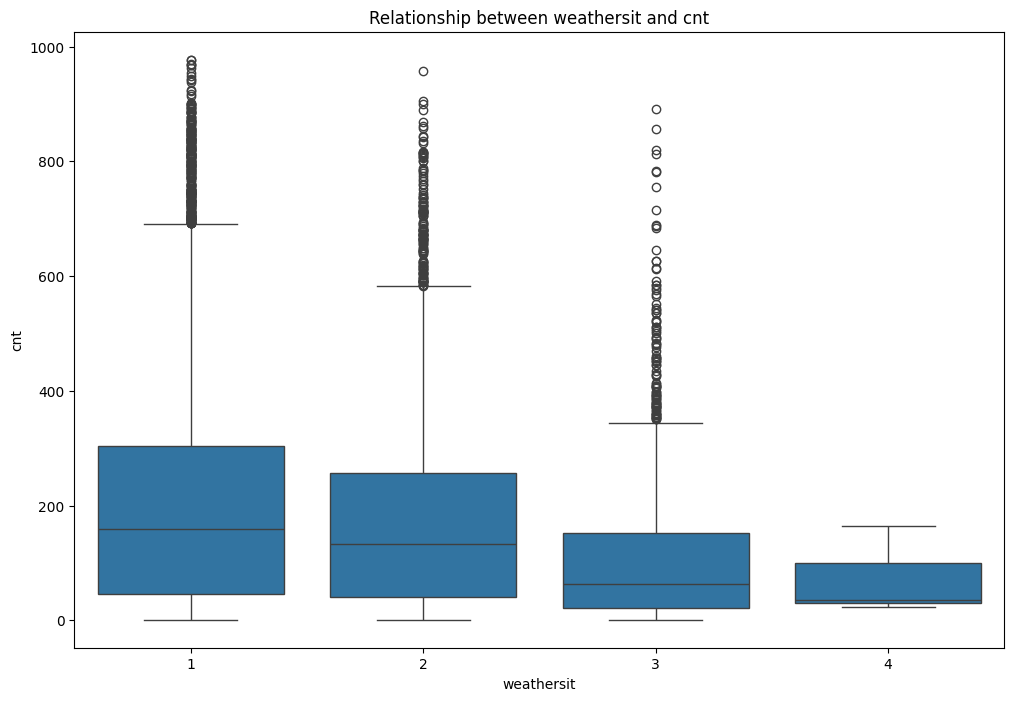

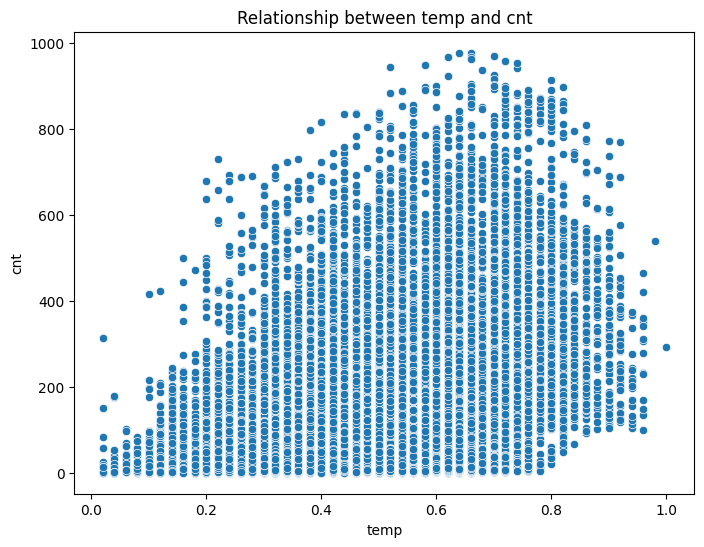

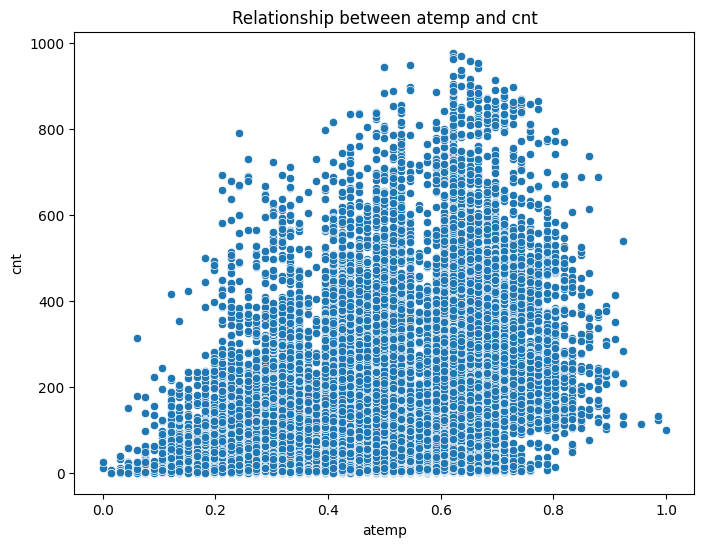

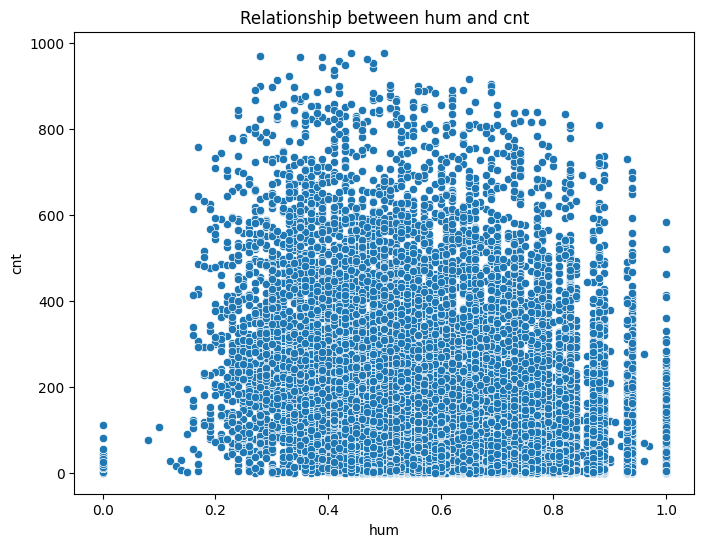

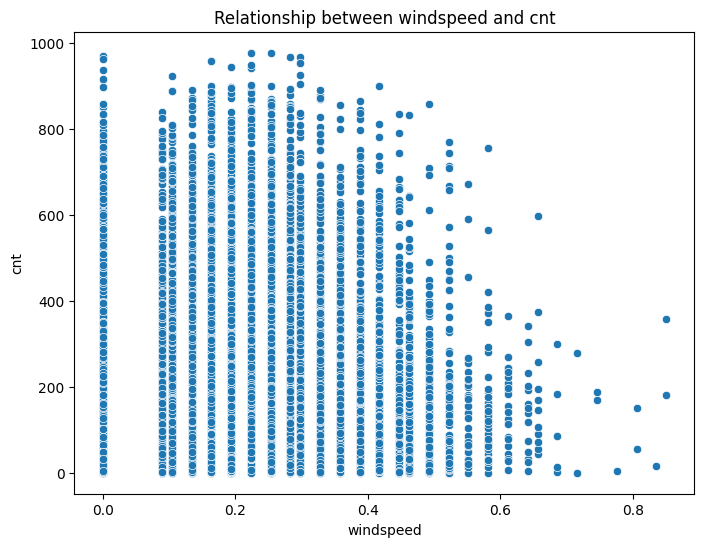

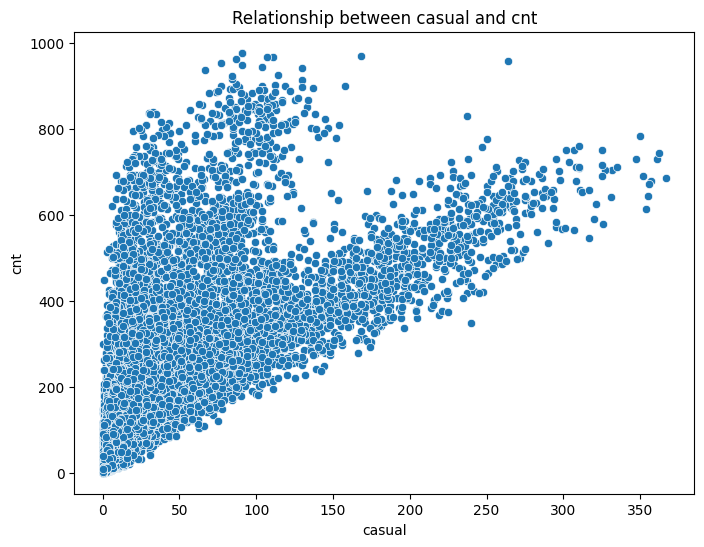

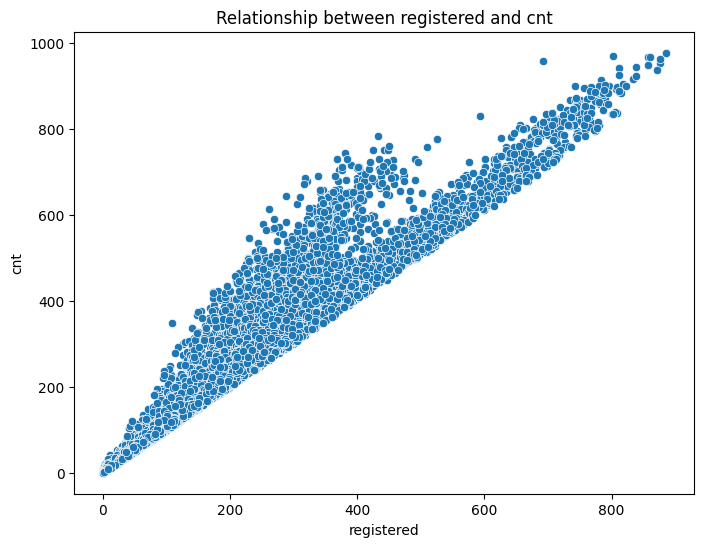

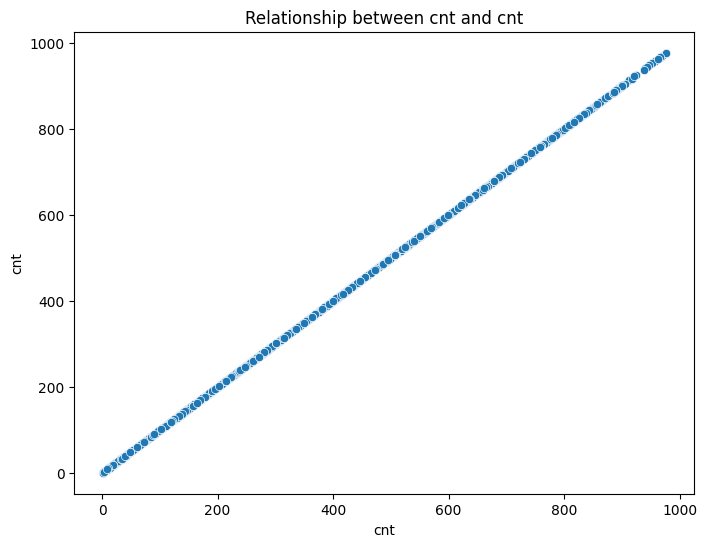

In [47]:
# Relationship between categorical features and cnt
for column in cat_df.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=column, y='cnt', data=df)
    plt.title(f'Relationship between {column} and cnt')
    plt.show()

# Relationship between numerical features and cnt
for column in num_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y='cnt', data=df)
    plt.title(f'Relationship between {column} and cnt')
    plt.show()

####season vs cnt: higher median for 2 and 3, i.e. more riders in summer and spring
####year vs cnt: increase in riders in year 1.
####month vs cnt: more riders during the middle of the year (the warmer months)
####hour vs cnt: high during peak hours, very less at 3 and 4.
####holiday vs cnt: more riders on non-holidays
####weekday vs cnt: relatively similar on all days.
####working day vs cnt: relatively similar.
####weathersit vs cnt: more riders when weather is better.
####temp & atemp vs cnt: somewhat linear relation.
####hum vs cnt: shows a negative relation with cnt but not as clear.
####windspeed vs cnt: shows a negative relation but theres a lot of scatter.
####casual & registered vs cnt: strong positive linear relation

##Correlation Matrix

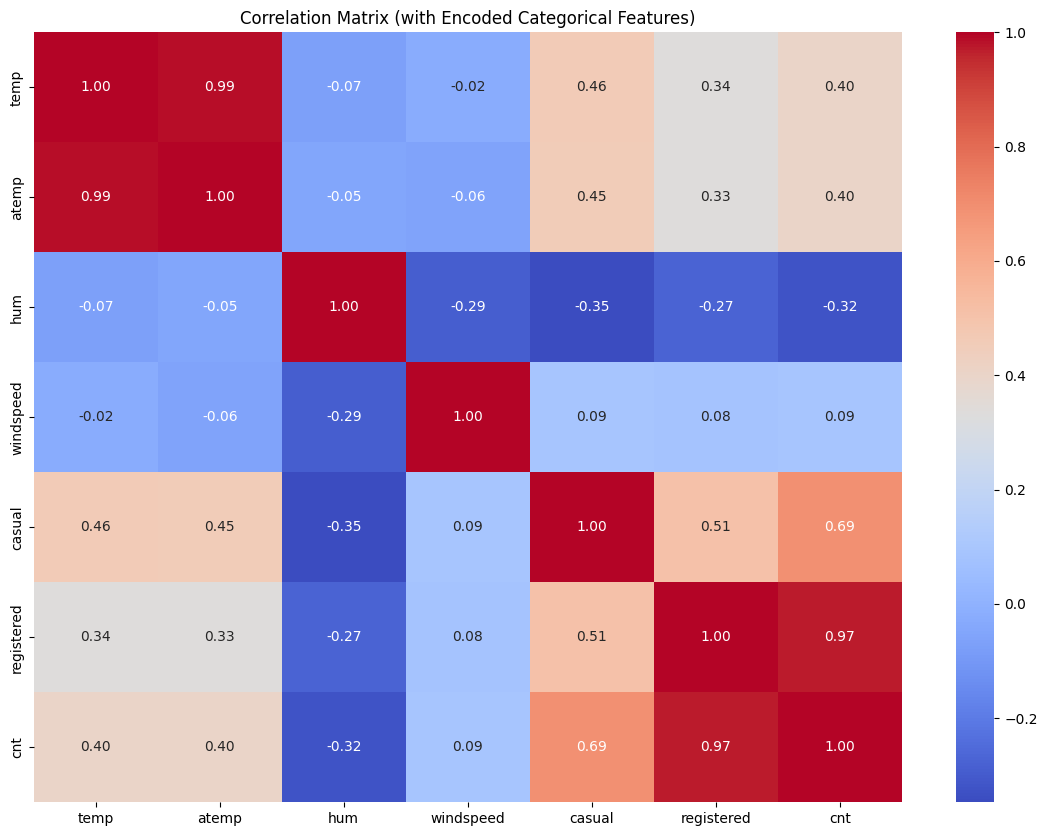

In [48]:
corr_matrix = num_df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title("Correlation Matrix (with Encoded Categorical Features)")
plt.show()

##Encoding Categorical Features
####One hot encoding

In [49]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0.24,0.2879,0.81,0.0,3,13,16,False,...,False,False,False,False,False,True,False,False,False,False
1,2,2011-01-01,0.22,0.2727,0.80,0.0,8,32,40,False,...,False,False,False,False,False,True,False,False,False,False
2,3,2011-01-01,0.22,0.2727,0.80,0.0,5,27,32,False,...,False,False,False,False,False,True,False,False,False,False
3,4,2011-01-01,0.24,0.2879,0.75,0.0,3,10,13,False,...,False,False,False,False,False,True,False,False,False,False
4,5,2011-01-01,0.24,0.2879,0.75,0.0,0,1,1,False,...,False,False,False,False,False,True,False,False,False,False


###Dropping columns
####instant and date are irrelevant, casual and registered are highly correlated to each other, which can lead to multicollinearity

In [51]:
df_model = df_encoded.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
df_model.head()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.2879,0.81,0.0,16,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.22,0.2727,0.80,0.0,40,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0.22,0.2727,0.80,0.0,32,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.24,0.2879,0.75,0.0,13,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0.24,0.2879,0.75,0.0,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


##Model Training

In [52]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, classification_report
from sklearn.ensemble import StackingRegressor, StackingClassifier

In [53]:
x = df_model.drop('cnt', axis=1)

In [54]:
y_reg = df_model['cnt']

In [55]:
y_class = pd.qcut(y_reg, q=3, labels=False)

In [56]:
x_train, x_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(x, y_reg, y_class, test_size=0.2, random_state=42)

In [57]:
#Linear Regression
reg_lr = LinearRegression()
reg_lr.fit(x_train, y_reg_train)
preds_lr = reg_lr.predict(x_test)

rmse_lr = np.sqrt(mean_squared_error(y_reg_test, preds_lr))
r2_lr = r2_score(y_reg_test, preds_lr)
print("Linear Regression → RMSE:", rmse_lr, " R²:", r2_lr)

Linear Regression → RMSE: 100.44594623557185  R²: 0.681375112801918


In [58]:
#Random Forest Regressor
reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(x_train, y_reg_train)
preds_rf = reg_rf.predict(x_test)

rmse_rf = np.sqrt(mean_squared_error(y_reg_test, preds_rf))
r2_rf = r2_score(y_reg_test, preds_rf)
print("Random Forest Regressor → RMSE:", rmse_rf, " R²:", r2_rf)


Random Forest Regressor → RMSE: 51.92438205298982  R²: 0.914855315696444


In [59]:
#XG Boost Regressor
reg_xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
reg_xgb.fit(x_train, y_reg_train)
preds_xgb = reg_xgb.predict(x_test)

rmse_xgb = np.sqrt(mean_squared_error(y_reg_test, preds_xgb))
r2_xgb = r2_score(y_reg_test, preds_xgb)
print("XGB Regressor → RMSE:", rmse_xgb, " R²:", r2_xgb)


XGB Regressor → RMSE: 49.766461433316216  R²: 0.921785295009613


In [60]:
#Stacking
stack_reg = StackingRegressor(estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor(random_state=42))],
                              final_estimator=XGBRegressor(objective="reg:squarederror", random_state=42))

In [61]:
stack_reg.fit(x_train, y_reg_train)
preds_stack = stack_reg.predict(x_test)

rmse_stack = np.sqrt(mean_squared_error(y_reg_test, preds_stack))
r2_stack = r2_score(y_reg_test, preds_stack)
print("Stacking Regressor → RMSE:", rmse_stack, " R²:", r2_stack)

Stacking Regressor → RMSE: 53.99125091884101  R²: 0.907941997051239


In [62]:
#Logistic Regression
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_lr.fit(x_train, y_class_train)
preds_lr_clf = clf_lr.predict(x_test)

print("Logistic Regression → Accuracy:", accuracy_score(y_class_test, preds_lr_clf))
print("F1-score:", f1_score(y_class_test, preds_lr_clf, average="weighted"))


Logistic Regression → Accuracy: 0.7928653624856157
F1-score: 0.7933263838857665


In [63]:
#Random Forest Classifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(x_train, y_class_train)
preds_rf_clf = clf_rf.predict(x_test)

print("Random Forest Classifier → Accuracy:", accuracy_score(y_class_test, preds_rf_clf))
print("F1-score:", f1_score(y_class_test, preds_rf_clf, average="weighted"))


Random Forest Classifier → Accuracy: 0.8587456846950517
F1-score: 0.8593024491880261


In [64]:
#XG Boost Classifier
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
clf_xgb.fit(x_train, y_class_train)
preds_xgb_clf = clf_xgb.predict(x_test)

print("XGB Classifier → Accuracy:", accuracy_score(y_class_test, preds_xgb_clf))
print("F1-score:", f1_score(y_class_test, preds_xgb_clf, average="weighted"))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:00:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB Classifier → Accuracy: 0.8760069044879172
F1-score: 0.8764812572789189


In [65]:
#Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42))
    ],
    voting='hard'
)
voting_clf.fit(x_train, y_class_train)
preds_vote = voting_clf.predict(x_test)

print("Voting Classifier → Accuracy:", accuracy_score(y_class_test, preds_vote))
print("F1-score:", f1_score(y_class_test, preds_vote, average="weighted"))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:00:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Voting Classifier → Accuracy: 0.8765822784810127
F1-score: 0.8768475306401674


In [66]:
#Stacking Classifier
stack_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ],
    final_estimator=XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
)

stack_clf.fit(x_train, y_class_train)
preds_stack_clf = stack_clf.predict(x_test)

print("Stacking Classifier → Accuracy:", accuracy_score(y_class_test, preds_stack_clf))
print("F1-score:", f1_score(y_class_test, preds_stack_clf, average="weighted"))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:01:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Stacking Classifier → Accuracy: 0.8627733026467204
F1-score: 0.8629374753825877


In [67]:
reg_results = pd.DataFrame({
    "Model": ["LinearRegression", "RandomForestRegressor", "XGBRegressor", "StackingRegressor"],
    "RMSE": [rmse_lr, rmse_rf, rmse_xgb, rmse_stack],
    "R²": [r2_lr, r2_rf, r2_xgb, r2_stack]
})
print(reg_results.sort_values(by="R²", ascending=False))


                   Model        RMSE        R²
2           XGBRegressor   49.766461  0.921785
1  RandomForestRegressor   51.924382  0.914855
3      StackingRegressor   53.991251  0.907942
0       LinearRegression  100.445946  0.681375


In [68]:
clf_results = pd.DataFrame({
    "Model": ["LogisticRegression", "RandomForestClassifier", "XGBClassifier", "VotingClassifier", "StackingClassifier"],
    "Accuracy": [
        accuracy_score(y_class_test, preds_lr_clf),
        accuracy_score(y_class_test, preds_rf_clf),
        accuracy_score(y_class_test, preds_xgb_clf),
        accuracy_score(y_class_test, preds_vote),
        accuracy_score(y_class_test, preds_stack_clf),
    ],
    "F1-score": [
        f1_score(y_class_test, preds_lr_clf, average="weighted"),
        f1_score(y_class_test, preds_rf_clf, average="weighted"),
        f1_score(y_class_test, preds_xgb_clf, average="weighted"),
        f1_score(y_class_test, preds_vote, average="weighted"),
        f1_score(y_class_test, preds_stack_clf, average="weighted"),
    ]
})
print(clf_results.sort_values(by="Accuracy", ascending=False))


                    Model  Accuracy  F1-score
3        VotingClassifier  0.876582  0.876848
2           XGBClassifier  0.876007  0.876481
4      StackingClassifier  0.862773  0.862937
1  RandomForestClassifier  0.858746  0.859302
0      LogisticRegression  0.792865  0.793326


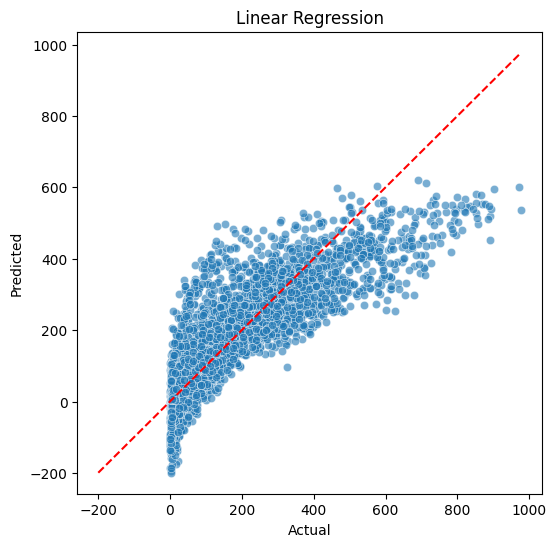

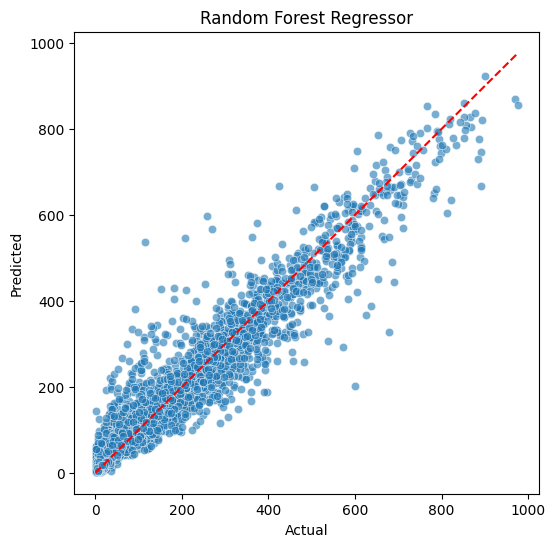

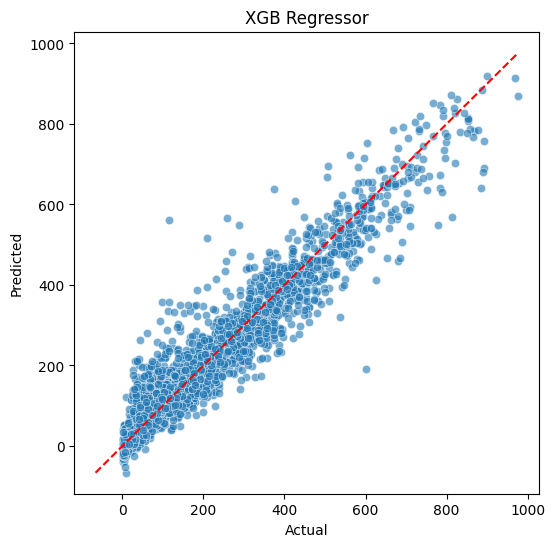

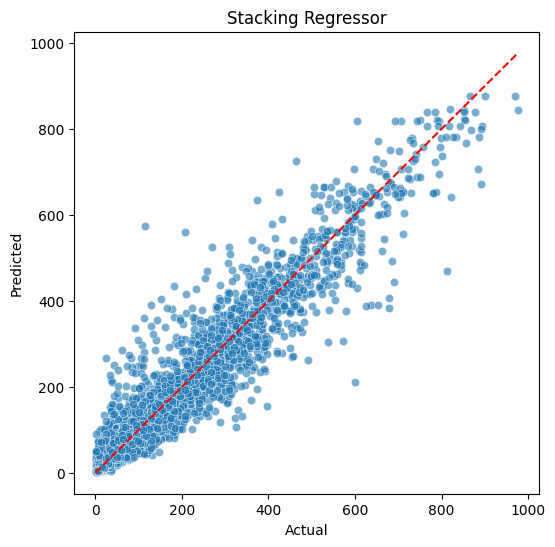

In [69]:
#Regression Plot

# Plot function
def plot_regression_results(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    # Add y=x line
    lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
    plt.plot(lims, lims, 'r--')
    plt.show()

# Visualize different models
plot_regression_results(y_reg_test, preds_lr, "Linear Regression")
plot_regression_results(y_reg_test, preds_rf, "Random Forest Regressor")
plot_regression_results(y_reg_test, preds_xgb, "XGB Regressor")
plot_regression_results(y_reg_test, preds_stack, "Stacking Regressor")

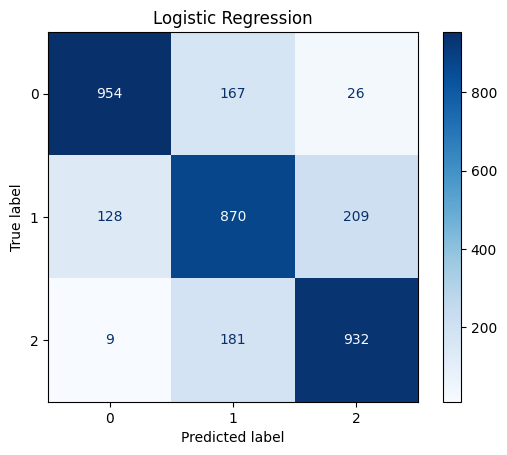

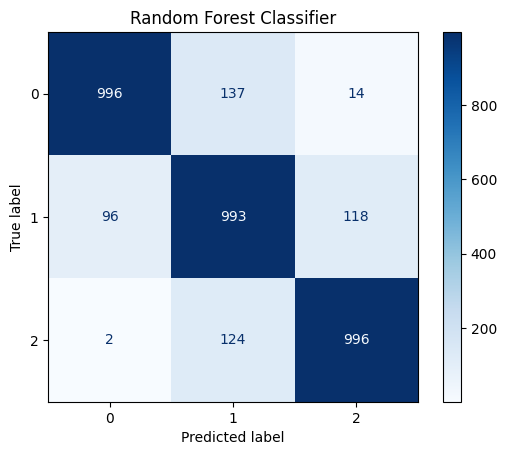

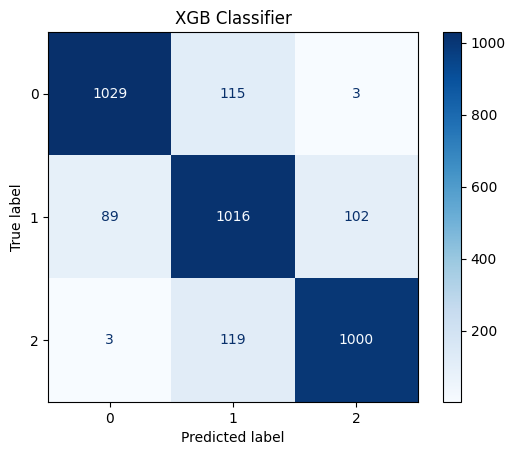

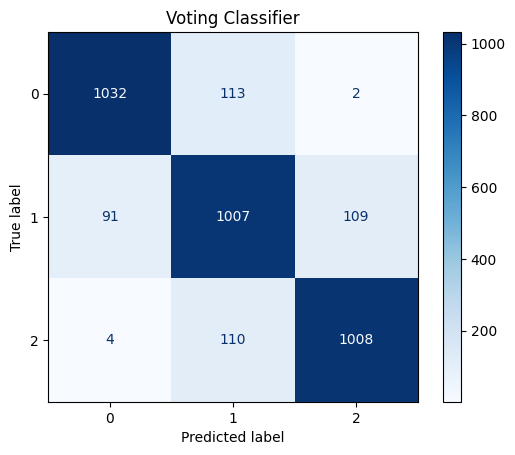

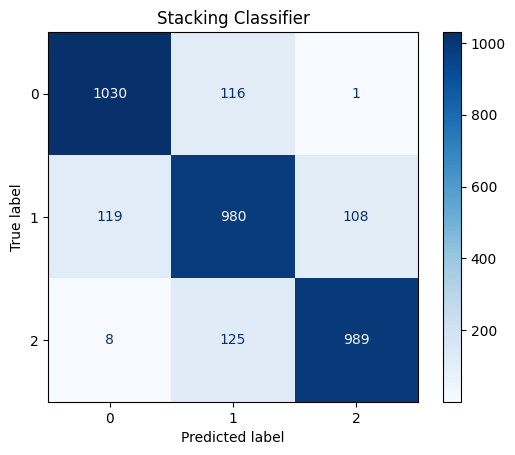

In [70]:
#Classification Plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format='d')
    plt.title(title)
    plt.show()

# Visualize
plot_conf_matrix(y_class_test, preds_lr_clf, "Logistic Regression")
plot_conf_matrix(y_class_test, preds_rf_clf, "Random Forest Classifier")
plot_conf_matrix(y_class_test, preds_xgb_clf, "XGB Classifier")
plot_conf_matrix(y_class_test, preds_vote, "Voting Classifier")
plot_conf_matrix(y_class_test, preds_stack_clf, "Stacking Classifier")

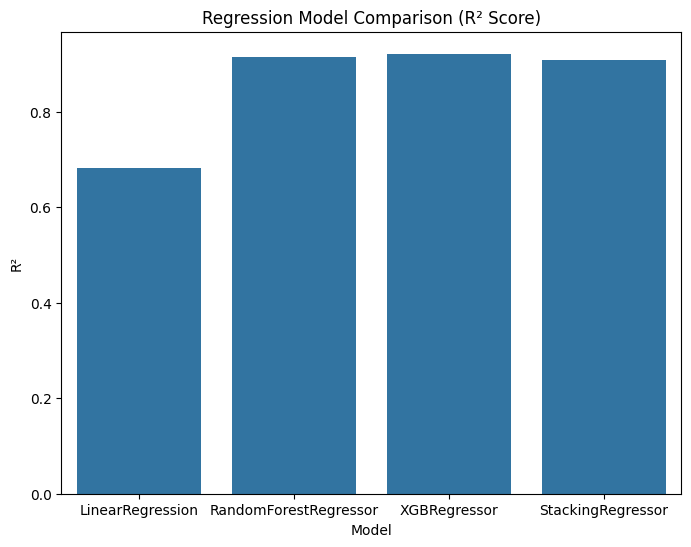

In [71]:
plt.figure(figsize=(8,6))
sns.barplot(x="Model", y="R²", data=reg_results)
plt.title("Regression Model Comparison (R² Score)")
plt.show()


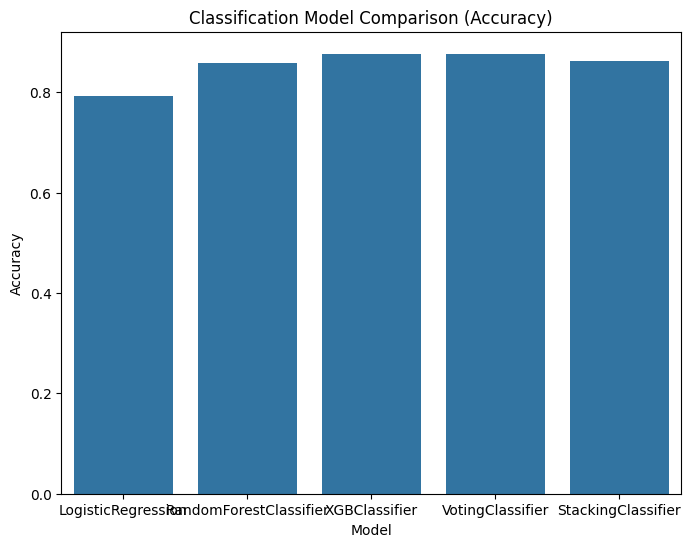

In [72]:
plt.figure(figsize=(8,6))
sns.barplot(x="Model", y="Accuracy", data=clf_results)
plt.title("Classification Model Comparison (Accuracy)")
plt.show()


Ensemble methods consistently outperform individual base models.

Stacking emerges as the most effective approach, since it leverages the strengths of all models through a meta-learner.

